# BoxOffice 2018
## Data Pre-Processing

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import re
import random
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline 

In [2]:
dft = pd.read_csv("./train.csv",encoding="utf8")

dftest = pd.read_csv("./test.csv",encoding="utf8")
print(dft.info())
print()
print(dftest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

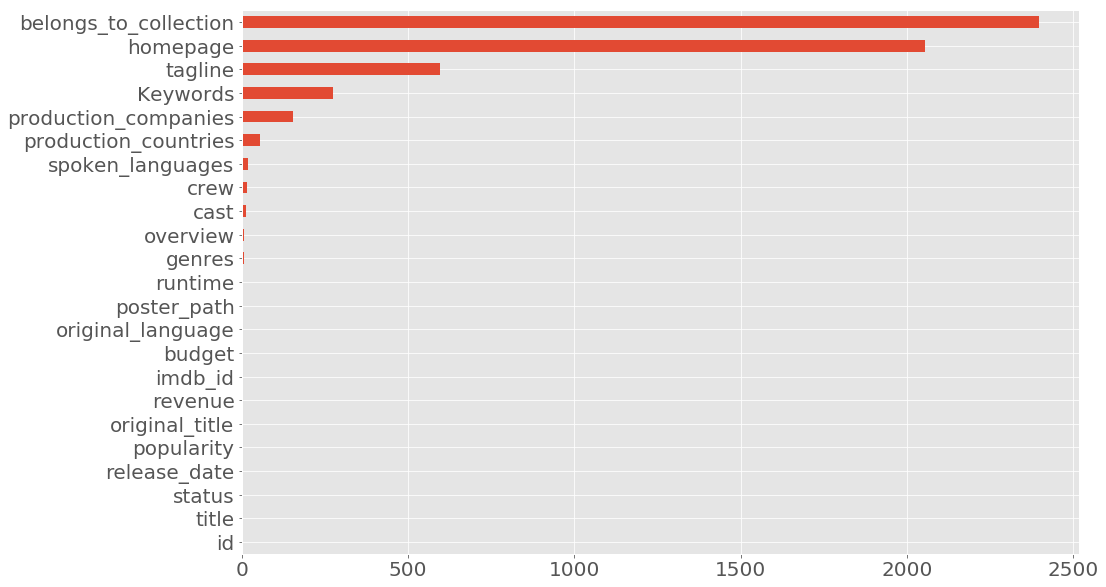

In [3]:
fig = plt.figure(figsize=(15, 10))
dft.isna().sum().sort_values(ascending=True).plot(kind='barh',color='C0', fontsize=20)

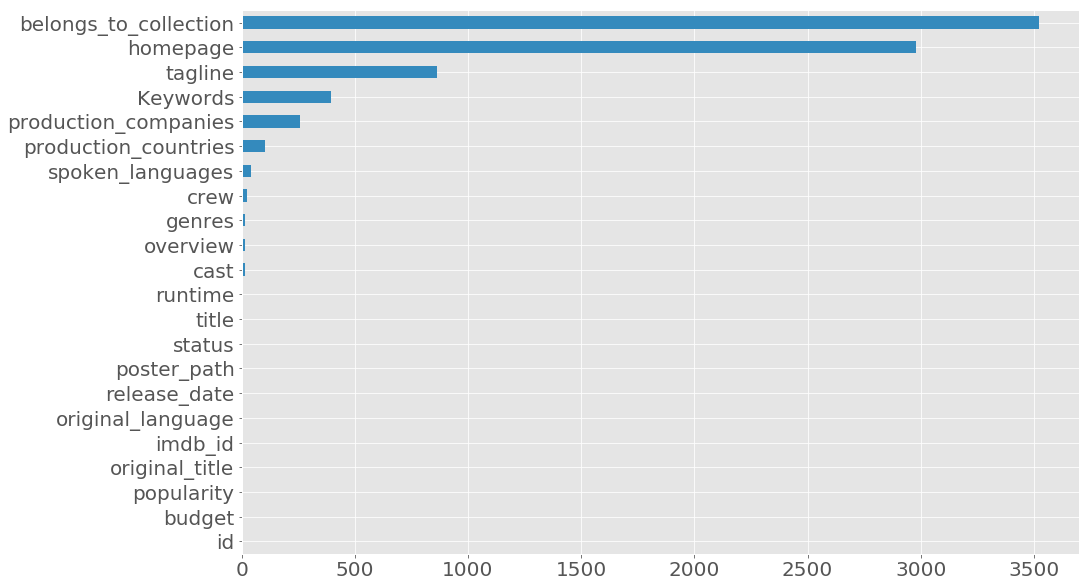

In [4]:
fig = plt.figure(figsize=(15, 10))
dftest.isna().sum().sort_values(ascending=True).plot(kind='barh',color='C1', fontsize=20)

Text(0.5, 0, 'Popularity of the Movie')

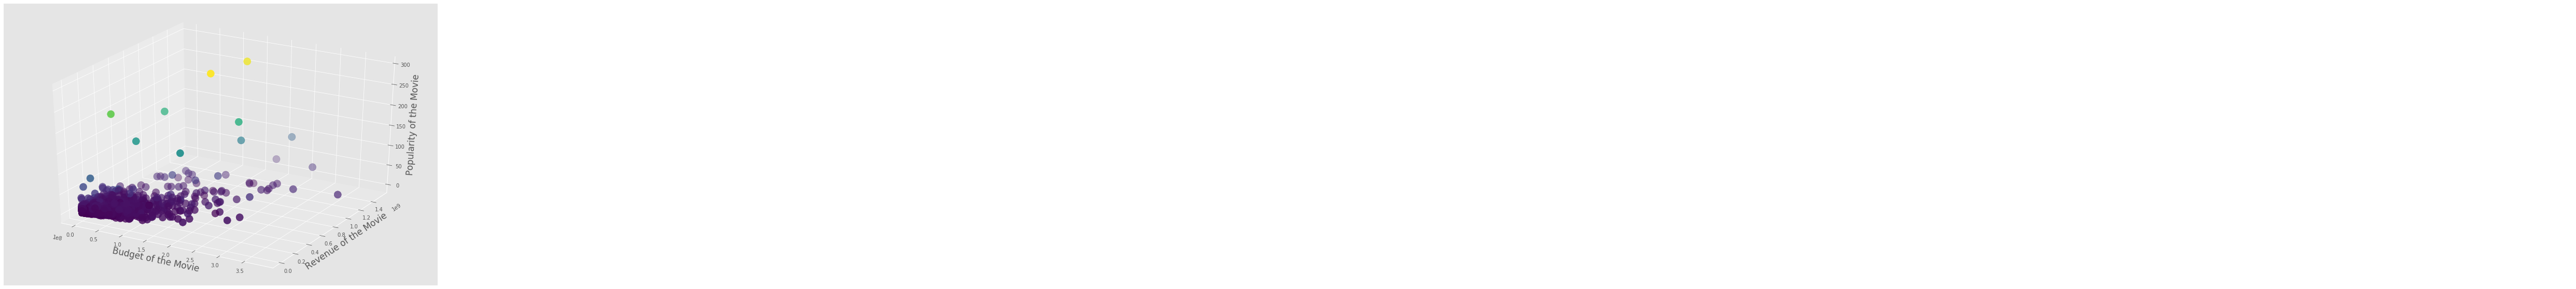

In [5]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111,projection = '3d')

# Data for three-dimensional scattered points
zdata =dft.popularity
xdata =dft.budget
ydata = dft.revenue
ax.scatter3D(xdata, ydata, zdata, c=zdata, s = 200)
ax.set_xlabel('Budget of the Movie',fontsize=17)
ax.set_ylabel('Revenue of the Movie',fontsize=17)
ax.set_zlabel('Popularity of the Movie',fontsize=17)

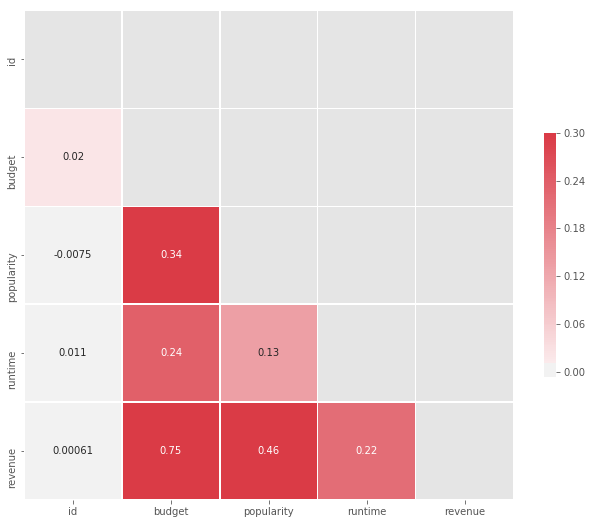

In [6]:
# Creating correlation matrix 

corr = dft.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
import ast

features_list = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']
dft[features_list] = dft[features_list].fillna('NA').copy()

def strToList(x):
    m = re.findall(r'\{.*\}',x)
    l = list()
    if m:
        l = list()
        for i in m:
            tmp = ast.literal_eval(i)
            if type(tmp) is tuple:
                l = list(tmp)
            else:
                l.append(tmp)
    return l 
    
for i in features_list:
    dft[i+"_v2"]=dft[i].apply(lambda x:strToList(x))

In [10]:
dft.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew,revenue,belongs_to_collection_v2,genres_v2,production_companies_v2,production_countries_v2,spoken_languages_v2,Keywords_v2,cast_v2,crew_v2
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,{'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7op...,"{'id': 35, 'name': 'Comedy'}","({'id': 4, 'name': 'Paramount Pictures'}, {'id...","{'name': 'United States of America', 'iso_3166...","{'iso_639_1': 'en', 'name': 'English'}","({'id': 4379, 'name': 'time travel'}, {'id': 9...","({'id': 52997, 'credit_id': '52fe4ee7c3a36847f...","({'id': 1449071, 'credit_id': '59ac067c9251410..."
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,{'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1...,"({'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","{'id': 2, 'name': 'Walt Disney Pictures'}","{'name': 'United States of America', 'iso_3166...","{'iso_639_1': 'en', 'name': 'English'}","({'id': 2505, 'name': 'coronation'}, {'id': 42...","({'id': 1813, 'credit_id': '52fe43fe9251416c75...","({'id': 1201, 'credit_id': '52fe43fe9251416c75..."
2,3,NA,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,None,"{'id': 18, 'name': 'Drama'}","({'id': 2266, 'name': 'Bold Films'}, {'id': 31...","{'name': 'United States of America', 'iso_3166...","{'iso_639_1': 'en', 'name': 'English'}","({'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","({'id': 996701, 'credit_id': '52fe4ef7c3a36847...","({'id': 494, 'credit_id': '54d5356ec3a3683ba00..."
3,4,NA,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,None,"({'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",None,"{'name': 'India', 'iso_3166_1': 'IN'}","({'iso_639_1': 'en', 'name': 'English'}, {'iso...","({'id': 10092, 'name': 'mystery'}, {'id': 1054...","({'id': 35068, 'credit_id': '52fe48779251416c9...","({'id': 95510, 'credit_id': '52fe48779251416c9..."
4,5,NA,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,None,"({'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",None,"{'name': 'South Korea', 'iso_3166_1': 'KR'}","{'iso_639_1': 'ko', 'name': '한국어/조선말'}",None,"({'id': 84751, 'credit_id': '52fe464b9251416c7...","({'id': 84749, 'credit_id': '52fe464b9251416c7..."


In [12]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
id                          3000 non-null int64
belongs_to_collection       3000 non-null object
budget                      3000 non-null int64
genres                      3000 non-null object
homepage                    946 non-null object
imdb_id                     3000 non-null object
original_language           3000 non-null object
original_title              3000 non-null object
overview                    2992 non-null object
popularity                  3000 non-null float64
poster_path                 2999 non-null object
production_companies        3000 non-null object
production_countries        3000 non-null object
release_date                3000 non-null object
runtime                     2998 non-null float64
spoken_languages            3000 non-null object
status                      3000 non-null object
tagline                     2403 non-null object
title       

In [13]:
dft.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew,revenue,belongs_to_collection_v2,genres_v2,production_companies_v2,production_countries_v2,spoken_languages_v2,Keywords_v2,cast_v2,crew_v2
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,[{'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7o...,"[{'id': 35, 'name': 'Comedy'}]","[({'id': 4, 'name': 'Paramount Pictures'}, {'i...","[{'name': 'United States of America', 'iso_316...","[{'iso_639_1': 'en', 'name': 'English'}]","[({'id': 4379, 'name': 'time travel'}, {'id': ...","[({'id': 52997, 'credit_id': '52fe4ee7c3a36847...","[({'id': 1449071, 'credit_id': '59ac067c925141..."
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,[{'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v...,"[({'id': 35, 'name': 'Comedy'}, {'id': 18, 'na...","[{'id': 2, 'name': 'Walt Disney Pictures'}]","[{'name': 'United States of America', 'iso_316...","[{'iso_639_1': 'en', 'name': 'English'}]","[({'id': 2505, 'name': 'coronation'}, {'id': 4...","[({'id': 1813, 'credit_id': '52fe43fe9251416c7...","[({'id': 1201, 'credit_id': '52fe43fe9251416c7..."
2,3,NA,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,None,"[{'id': 18, 'name': 'Drama'}]","[({'id': 2266, 'name': 'Bold Films'}, {'id': 3...","[{'name': 'United States of America', 'iso_316...","[{'iso_639_1': 'en', 'name': 'English'}]","[({'id': 1416, 'name': 'jazz'}, {'id': 1523, '...","[({'id': 996701, 'credit_id': '52fe4ef7c3a3684...","[({'id': 494, 'credit_id': '54d5356ec3a3683ba0..."


In [14]:
quanti = ['runtime','budget','popularity','revenue']
dft[quanti].describe()

,runtime,budget,popularity,revenue
count,2998.000000,3.000000e+03,3000.000000,3.000000e+03
mean,107.856571,2.253133e+07,8.463274,6.672585e+07
std,22.086434,3.702609e+07,12.104000,1.375323e+08
min,0.000000,0.000000e+00,0.000001,1.000000e+00
25%,94.000000,0.000000e+00,4.018053,2.379808e+06
50%,104.000000,8.000000e+06,7.374861,1.680707e+07
75%,118.000000,2.900000e+07,10.890983,6.891920e+07
max,338.000000,3.800000e+08,294.337037,1.519558e+09


In [15]:
dft['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

## Features engineering
### Films Genres Feature

In [30]:
d_count = dict()

##My function
def aux(d_count, l):
    if not l is None:
        for i in l:
            if type(i) is tuple:
                for j in i:
                    d=dict(j)
                    if d['name'] in d_count.keys():
                        d_count[d['name']] += 1
                    else:
                        d_count[d['name']] =1
            else:
                d = i
                if d['name'] in d_count.keys():
                    d_count[d['name']] += 1
                else:
                    d_count[d['name']] =1
        


dft['genres_v2'].apply(lambda x: aux(d_count,x))
    
genres = pd.DataFrame.from_dict({'Genres': list(d_count.keys()), 'Nb Films':list(d_count.values())})
genres = genres[['Genres','Nb Films']].copy()
top_genres = genres.nlargest(5, 'Nb Films')

#### More Pythonic Way

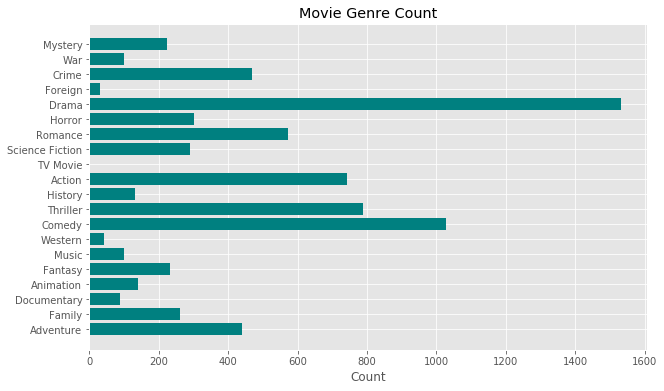

In [31]:
from collections import Counter
##Optimized solution with Counter data structure subclass of Dictionnary
##need to import Counter from module collections

list_of_genres = list(dft['genres_v2'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_genres=Counter([i for j in list_of_genres for i in j]).most_common() #type list 
fig = plt.figure(figsize=(10, 6))
data=dict(most_common_genres)
names = list(data.keys())
values = list(data.values())

plt.barh(sorted(range(len(data)),reverse=True),values,tick_label=names,color='teal')
plt.xlabel('Count')
plt.title('Movie Genre Count')
plt.show()

#### Other method to count

In [ ]:
fig = plt.figure(figsize=(50,50))
ax = plt.subplot(222,projection = '3d')

# Data for three-dimensional scattered points
zdata =dft.popularity
xdata =dft.budget
ydata = dft.revenue
ax.scatter3D(xdata, ydata, zdata, c=zdata, s = 200)
ax.set_xlabel('Budget of the Movie',fontsize=17)
ax.set_ylabel('Revenue of the Movie',fontsize=17)
ax.set_zlabel('Popularity of the Movie',fontsize=17)

In [ ]:
 def plot_graph(n_top,df,nbrow):
    top_df = df.nlargest(n_top, 'Nb Films')
    col = top_df.columns.tolist()
    
    def gen_list_random_colors(x):
        l = list()
        for i in range(x):
            a = random.uniform(0,1)
            if a in l:
                a = random.uniform(0,1)
            else:
                l.append(a)
        return l
    
    c =list(cm.rainbow(gen_list_random_colors(n_top)))
    fig = plt.figure(figsize=(15, 10))
    fig, ax = plt.subplots()
    ax.barh(top_df[col[0]],(top_df[col[1]]/nbrow)*100,color=c)
    ax.set_title('Most Frequent '+col[0])
    plt.ylabel(col[0])
    plt.xlabel("% of the dataset")
    plt.show()
    
plot_graph(10,genres,dft.shape[0])

#### Creation of variables type of films which is a list with the different types of the films

In [ ]:
def aux2(l):
    l_g = list()
    if not l is None:
        for i in l:
            if type(i) is tuple:
                for j in i:
                    d=dict(j)
                    if not d['name'] in l_g:
                        l_g.append(d['name'])
                    else:
                        pass
            else:
                d=i
                if not d['name'] in l_g:
                        l_g.append(d['name'])
                else:
                    pass
        return l_g
    else: 
        return []

dft['genre_film'] = dft['genres_v2'].apply(lambda x: aux2(x))
dft['genre_film'].head()

In [ ]:
def df_index(col_name,value,df):
    l = list()
    for i in df.index.tolist():
        if value in df[col_name][i]:
            l.append(i)
    return l

for i in top_genres['Genres'].values:
    print("Genres : "+i)
    print(dft[quanti].loc[df_index('genre_film',i,dft)].describe())
    print()

In [ ]:
def indic_var(x,c):
    if c in x:
        return 1
    else:
        return 0
        
g = top_genres['Genres'].tolist()

g.sort()        
for i in g:
    dft["genre_"+i] = dft['genre_film'].apply(lambda x: indic_var(x,i))
    
dft.drop('genres_v2',axis=1,inplace=True)
dft.dtypes

### Production_companies Feature

In [ ]:
d_count = dict()

dft['production_companies_v2'].apply(lambda x: aux(d_count,x))
    
prod_companies = pd.DataFrame.from_dict({'Prod_Company': list(d_count.keys()), 'Nb Films':list(d_count.values())})
prod_companies = prod_companies[['Prod_Company','Nb Films']].copy()
top_prod = prod_companies.nlargest(5, 'Nb Films')

**Top 10  Production Compagnies before correction**

In [ ]:
plot_graph(10,prod_companies,dft.shape[0])

#### **Top 10  Production Compagnies after correction**

In [ ]:
def aux3(x,d1,d2):
    r = str.split(x," ")
    k = r[0]
    if "The" in r:
        k = k+" "+r[1]
    if k in d2.keys():
        d2[k]+=d1[x]
    else:
        d2[k]=d1[x]

best_prod = dict()
for i in d_count.keys():
    aux3(i,d_count,best_prod)


prod_companies_v2 = pd.DataFrame.from_dict({'Prod_Company': list(best_prod.keys()), 
                                            'Nb Films':list(best_prod.values())})
prod_companies_v2 = prod_companies_v2[['Prod_Company','Nb Films']].copy()
top_prod = prod_companies_v2.nlargest(5, 'Nb Films')

In [ ]:
plot_graph(10,prod_companies_v2,dft.shape[0])

In [ ]:
def aux3(l1,l2):
    l3 = list()
    if len(l1)>0:
        for i in l1:
            tmp = str.split(i," ")
            if tmp[0]=="The":
                if (tmp[0]+" "+tmp[1]) in l2:
                    l3.append(tmp[0]+" "+tmp[1])
            else:
                if tmp[0] in l2:
                    l3.append(tmp[0])
        return l3
    else:
        return l3
    
    
dft['best_prod'] = dft['production_companies_v2'].apply(lambda x: aux3(aux2(x),best_prod))
dft['best_prod'].head(10)

In [ ]:
for i in top_prod['Prod_Company'].tolist():
    dft["prod_"+i] = dft['best_prod'].apply(lambda x: indic_var(x,i))

dft.drop(['best_prod','production_companies_v2'],axis=1,inplace=True)    
dft.dtypes

### Spoken Languages Feature

In [ ]:
d_count = dict()

dft['spoken_languages_v2'].apply(lambda x: aux(d_count,x))
    
spok_lang = pd.DataFrame.from_dict({'Spoken_Lang': list(d_count.keys()), 'Nb Films':list(d_count.values())})
spok_lang = spok_lang[['Spoken_Lang','Nb Films']].copy()
top_lang = spok_lang.nlargest(5, 'Nb Films')

**Top 10 Spoken languages**

In [ ]:
tmp = spok_lang.nlargest(10, 'Nb Films')
print(tmp['Spoken_Lang'].values)
plot_graph(10,spok_lang,dft.shape[0])

In [ ]:
dft['lang_v2'] = dft['spoken_languages_v2'].apply(lambda x: aux2(x))

for i in top_lang['Spoken_Lang'].values.tolist():
    dft["lang_"+i] = dft['lang_v2'].apply(lambda x: indic_var(x,i))

dft.drop(['spoken_languages_v2'],axis=1,inplace=True)    
dft.dtypes

### Belongs_to_collection Feature

In [ ]:
d_count = dict()

dft['belongs_to_collection_v2'].apply(lambda x: aux(d_count,x))
    
coll = pd.DataFrame.from_dict({'Collection': list(d_count.keys()), 'Nb Films':list(d_count.values())})
coll = coll[['Collection','Nb Films']].copy()
top_coll = coll.nlargest(5, 'Nb Films')

**Top 10 Collections containing the most films**

In [ ]:
plot_graph(10,coll,dft.shape[0])

In [ ]:
def ind_coll(x):
    if len(x)>0:
        return 1
    else:
        return 0

dft['indic_Coll'] = (dft['belongs_to_collection_v2'].apply(lambda x: aux2(x))).apply(lambda x: ind_coll(x))
dft.drop('belongs_to_collection_v2',axis=1,inplace=True)
dft.dtypes

### Keywords Feature

In [ ]:
d_count = dict()
dft['Keywords_v2'].apply(lambda x: aux(d_count,x))
    
keywords = pd.DataFrame.from_dict({'Keyword': list(d_count.keys()), 'Nb Films':list(d_count.values())})
keywords = keywords[['Keyword','Nb Films']].copy()
top_key = keywords.nlargest(5, 'Nb Films')

**Top 20 Keywords**

In [ ]:
plot_graph(20,keywords,dft.shape[0])

In [ ]:
dft['Key_list'] = dft['Keywords_v2'].apply(lambda x: aux2(x))
dft['Key_list'].head()

In [ ]:
for i in top_key['Keyword'].values.tolist():
    dft["Key_"+i] = dft['Key_list'].apply(lambda x: indic_var(x,i))

dft.drop(['Keywords_v2'],axis=1,inplace=True)    
dft.dtypes

### Cast Feature

In [ ]:
d_count = dict()
dft['cast_v2'].apply(lambda x: aux(d_count,x))

cast = pd.DataFrame.from_dict({'Actors': list(d_count.keys()), 'Nb Films':list(d_count.values())})
cast = cast[['Actors','Nb Films']].copy()
top_actors = cast.nlargest(5, 'Nb Films')

**Top 20 Actors with the most films**

In [ ]:
plot_graph(20,cast,dft.shape[0])

In [ ]:
dft['actors_list'] = dft['cast_v2'].apply(lambda x: aux2(x))
dft['actors_list'].head()

In [ ]:
for i in top_actors['Actors'].values.tolist():
    dft["Act_"+i] = dft['actors_list'].apply(lambda x: indic_var(x,i))

dft.drop(['cast_v2'],axis=1,inplace=True)    
dft.dtypes

### Crew Feature

In [ ]:
d_count = dict()

def aux_2(d_count, l):
    if not l is None:
        for i in l:
            if type(i) is tuple:
                for j in i:
                    d=dict(j)
                    if (d['job'],d['name']) in d_count.keys():
                        d_count[(d['job'],d['name'])] += 1
                    else:
                        d_count[(d['job'],d['name'])] =1
            else:
                d = i
                if (d['job'],d['name']) in d_count.keys():
                    d_count[(d['job'],d['name'])] += 1
                else:
                    d_count[(d['job'],d['name'])] =1

dft['crew_v2'].apply(lambda x: aux_2(d_count,x))

crew = pd.DataFrame.from_dict({'Staff': list(d_count.keys()), 'Nb Films':list(d_count.values())})
crew = crew[['Staff','Nb Films']].copy()
top_staff = crew.nlargest(5, 'Nb Films')

In [ ]:
def plot_graph_2(n_top,df,nbrow):
    top_df = df.nlargest(n_top, 'Nb Films')
    col = top_df.columns.tolist()
    
    def gen_list_random_colors(x):
        l = list()
        for i in range(x):
            a = random.uniform(0,1)
            if a in l:
                a = random.uniform(0,1)
            else:
                l.append(a)
        return l
    
    def role(x):
        return x[0]+" : "+x[1]
    
    res = top_df[col[0]].apply(role)
    
    c =list(cm.rainbow(gen_list_random_colors(n_top)))
    fig, ax = plt.subplots()
    ax.barh(res,(top_df[col[1]]/nbrow)*100,color=c)
    ax.set_title('Most Frequent '+col[0])
    plt.ylabel(col[0])
    plt.xlabel("% of the dataset")
    plt.show()

plot_graph_2(20,crew,dft.shape[0])

In [ ]:
dft['crew_list'] = dft['crew_v2'].apply(lambda x: aux2(x))
dft['crew_list'].head()

In [ ]:
for i in top_staff['Staff'].values.tolist():
    print(i[1])
    dft["Crew_"+i[1]] = dft['crew_list'].apply(lambda x: indic_var(x,i[1]))

dft.drop(['crew_v2'],axis=1,inplace=True)    
dft.dtypes

In [ ]:
my_df = dft.select_dtypes(include=['int32','int64','float']).copy()

my_df.columns

In [ ]:
my_df.isna().sum()

In [ ]:
my_df['runtime'].head()

In [ ]:
from sklearn.impute import SimpleImputer
my_df[['runtime']] = SimpleImputer(np.nan,strategy = 'mean').fit_transform(my_df[['runtime']])



my_df['status'] = dft['status'].copy()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
my_df['status_v2'] = encoder.fit_transform(my_df['status'])

In [ ]:
my_df.columns

## Prediction of Revenue

In [ ]:
Y = my_df['revenue']

X_vo = my_df.drop('revenue',axis=1)
print("X shape : "+str(X_vo.shape))

In [ ]:
features_select = X_vo.columns.tolist()
features_select.remove('id')
features_select.remove('status')

print(features_select)

### PCA

In [ ]:
X_vo.to_pickle("./my_df")

X = X_vo.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[['budget','popularity','runtime']] = scaler.fit_transform(X_vo[['budget','popularity','runtime']])

from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X2D = pca.fit_transform(X[['budget','popularity','runtime']])

pca_df = pd.DataFrame(data = X2D , 
        columns = ['PC'+str(i+1) for i in range(0,3)])

df_var_pca = pd.DataFrame({'var':pca.explained_variance_ratio_*100,
             'PC':['PC'+str(i+1) for i in range(0,3)]})

ax1 = sns.barplot(x='PC',y="var", data=df_var_pca, color='C0').set_title("% of Variance explained by PC")
ax2 = sns.lineplot(data=df_var_pca['var'],color="r")
# sns_plot.figure.savefig("./output.png")

In [ ]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([i for i in range(0,3)],['PC'+str(i+1) for i in range(0,3)],fontsize=10)
plt.colorbar()
plt.title("Features importance on PC",y=-0.2)
plt.xticks(range(3),['budget','popularity','runtime'],rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [ ]:
#Selecting worst features
# worst_features=features_select[8:]

# worst_features

#### Analysis correlation between the worst features

In [ ]:
# s=sns.heatmap(X[worst_features].corr(),cmap='coolwarm') 
# s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
# s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
# plt.show()

### MCA

In [ ]:
features_selQuali = features_select[3:]
features_selQuali

import prince
mca = prince.MCA(n_components=len(features_selQuali), n_iter=3,copy=True,check_input=True
                 ,engine='auto',random_state=42)
mca = mca.fit(X[features_selQuali])

In [ ]:
ax = mca.plot_coordinates(X=X[features_selQuali],ax=None,figsize=(6, 6),show_row_points=True,
                          row_points_size=10,show_row_labels=False,show_column_points=True,
                          column_points_size=30,show_column_labels=False,legend_n_cols=1)
ax.get_figure().savefig('./mca_coordinates.svg')

#### Changing the features of the model

In [ ]:
# features_select = features_select[:] #???

# X = pd.DataFrame(X2D[:,:5],columns=['PC'+str(i+1) for i in range(0,5)])
# print(X.head())

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
# plt.matshow(pca.components_,cmap='viridis')
# plt.yticks([i for i in range(0,8)],['PC'+str(i+1) for i in range(0,8)],fontsize=10)
# plt.colorbar()
# plt.title("Features importance on PC",y=-0.2)
# plt.xticks(range(len(features_select)),features_select,rotation=65,ha='left')
# plt.tight_layout()
# plt.show()# 

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[100,200], 'criterion':['mse'], 
               'max_depth':[80,100],'bootstrap':[True], 'oob_score':[True]}]

clf = RandomForestRegressor(random_state=42,n_jobs=-1,verbose=3)

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3)
#verbose option for display more logs on the screen, slowdown the algorithm

# Fit the grid search to the data
grid_search.fit(X_train[features_select],Y_train)

In [ ]:
print(grid_search.best_params_)

def evaluate(model, test_features, test_labels):
    # Use the forest's predict method on the test data
    predictions = model.predict(test_features)

    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * np.mean(errors / test_labels)
    
    # Calculate and display accuracy
    accuracy = 100 - mape
    
    print('Model Performance')
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error: {:0.4f} degrees.'.format(np.mean(errors)))
    
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test[features_select],Y_test)